In [66]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pgmpy.models import NaiveBayes
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import sys
import numpy as np
import pandas as pd
import os

In [67]:
Data_list=[
          [1,1,1,0,0],
          [1,0,1,0,0],
          [1,1,1,0,0],
          [1,1,0,0,0]
          ]

In [75]:
Data = pd.DataFrame(Data_list,columns=['A','B','C','D','E'])

In [77]:
fp = apriori(Data,use_colnames=True, min_support=0.1, max_len=4)
fp

,support,itemsets
0,1.00,(A)
1,0.75,(B)
2,0.75,(C)
3,0.75,"(A, B)"
4,0.75,"(A, C)"
5,0.50,"(B, C)"
6,0.50,"(A, B, C)"


In [79]:
association_rules(fp,min_threshold=0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(B),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.000000
1,(B),(A),0.75,1.00,0.75,1.000000,1.000000,0.0000,inf
2,(A),(C),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.000000
3,(C),(A),0.75,1.00,0.75,1.000000,1.000000,0.0000,inf
4,(B),(C),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.750000
5,(C),(B),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.750000
6,"(A, B)",(C),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.750000
7,"(A, C)",(B),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.750000
8,"(B, C)",(A),0.50,1.00,0.50,1.000000,1.000000,0.0000,inf
9,(A),"(B, C)",1.00,0.50,0.50,0.500000,1.000000,0.0000,1.000000


# Bayesian model

In [72]:
model = BayesianModel([
                       ('A','C'),
                       ('B','C'),
                      ])
model.fit(Data, estimator=MaximumLikelihoodEstimator)
print(model.get_cpds('C'))

+------+------+--------------------+
| A    | A(1) | A(1)               |
+------+------+--------------------+
| B    | B(0) | B(1)               |
+------+------+--------------------+
| C(0) | 0.0  | 0.3333333333333333 |
+------+------+--------------------+
| C(1) | 1.0  | 0.6666666666666666 |
+------+------+--------------------+


In [84]:
model = BayesianModel([
                       ('C','A'),
                       ('C','B'),
                      ])
model.fit(Data, estimator=MaximumLikelihoodEstimator)
print(model.get_cpds('A'))

+------+------+------+
| C    | C(0) | C(1) |
+------+------+------+
| A(1) | 1.0  | 1.0  |
+------+------+------+


In [85]:
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of A:
+------+------+------+
| C    | C(0) | C(1) |
+------+------+------+
| A(1) | 1.0  | 1.0  |
+------+------+------+
CPD of B:
+------+------+--------------------+
| C    | C(0) | C(1)               |
+------+------+--------------------+
| B(0) | 0.0  | 0.3333333333333333 |
+------+------+--------------------+
| B(1) | 1.0  | 0.6666666666666666 |
+------+------+--------------------+
CPD of C:
+------+------+
| C(0) | 0.25 |
+------+------+
| C(1) | 0.75 |
+------+------+


# Naive Bayes

In [73]:
model = NaiveBayes([
                       ('C','A'),
                       ('C','B'),
                      ])
model.fit(Data, estimator=MaximumLikelihoodEstimator)
print(model.get_cpds('C'))

+------+------+
| C(0) | 0.25 |
+------+------+
| C(1) | 0.75 |
+------+------+


# Example 2

In [96]:
Data_list=[
          #A,B,C,H,D,E,F
          [1,1,1,0,0,0,0],
          [1,1,1,1,1,0,0],
          [1,1,1,1,1,1,1]
          ]
Data = pd.DataFrame(Data_list,columns=['A','B','C','H','D','E','F'])

In [98]:
Data

,A,B,C,H,D,E,F
0,1,1,1,0,0,0,0
1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1


In [101]:
model = BayesianModel([
                   ('A','C'),
                   ('B','C'),
                   ('C','D'),
                   ('H','D'),
                   ('D','F'),
                   ('E','F'),
                   ])
model.fit(Data, estimator=MaximumLikelihoodEstimator)
print(model.get_cpds('C'))

+------+------+
| A    | A(1) |
+------+------+
| B    | B(1) |
+------+------+
| C(1) | 1.0  |
+------+------+


In [102]:
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of A:
+------+---+
| A(1) | 1 |
+------+---+
CPD of B:
+------+---+
| B(1) | 1 |
+------+---+
CPD of C:
+------+------+
| A    | A(1) |
+------+------+
| B    | B(1) |
+------+------+
| C(1) | 1.0  |
+------+------+
CPD of D:
+------+------+------+
| C    | C(1) | C(1) |
+------+------+------+
| H    | H(0) | H(1) |
+------+------+------+
| D(0) | 1.0  | 0.0  |
+------+------+------+
| D(1) | 0.0  | 1.0  |
+------+------+------+
CPD of E:
+------+----------+
| E(0) | 0.666667 |
+------+----------+
| E(1) | 0.333333 |
+------+----------+
CPD of F:
+------+------+------+------+------+
| D    | D(0) | D(0) | D(1) | D(1) |
+------+------+------+------+------+
| E    | E(0) | E(1) | E(0) | E(1) |
+------+------+------+------+------+
| F(0) | 1.0  | 0.5  | 1.0  | 0.0  |
+------+------+------+------+------+
| F(1) | 0.0  | 0.5  | 0.0  | 1.0  |
+------+------+------+------+------+
CPD of H:
+------+----------+
| H(0) | 0.333333 |
+------+----------+
| H(1) | 0.666667 |
+------+----------+


In [105]:
model.get_independencies()

(A _|_ H, B, E)
(A _|_ B, H | E)
(A _|_ D, H, F, E | C)
(A _|_ H, E | B)
(A _|_ B, E | H)
(A _|_ F, E | D)
(A _|_ D, H, E | F, C)
(A _|_ E | D, F)
(A _|_ D, F, H | C, E)
(A _|_ H | B, E)
(A _|_ B | H, E)
(A _|_ F | D, E)
(A _|_ D, F, H, E | B, C)
(A _|_ D, F, E | H, C)
(A _|_ F, H, E | D, C)
(A _|_ E | B, H)
(A _|_ F, E | D, B)
(A _|_ F, E | D, H)
(A _|_ D, H | C, F, E)
(A _|_ D, H, E | B, F, C)
(A _|_ D, E | H, F, C)
(A _|_ H, E | D, F, C)
(A _|_ E | D, B, F)
(A _|_ E | D, F, H)
(A _|_ D, F, H | B, C, E)
(A _|_ D, F | H, C, E)
(A _|_ F, H | D, C, E)
(A _|_ F | D, B, E)
(A _|_ F | D, H, E)
(A _|_ D, F, E | H, B, C)
(A _|_ F, H, E | D, B, C)
(A _|_ F, E | D, H, C)
(A _|_ F, E | D, B, H)
(A _|_ D, H | C, B, F, E)
(A _|_ D | C, H, F, E)
(A _|_ H | C, D, F, E)
(A _|_ D, E | H, B, F, C)
(A _|_ H, E | D, B, F, C)
(A _|_ E | D, H, F, C)
(A _|_ E | D, B, F, H)
(A _|_ D, F | H, B, C, E)
(A _|_ F, H | D, B, C, E)
(A _|_ F | D, H, C, E)
(A _|_ F | H, D, B, E)
(A _|_ F, E | H, D, B, C)
(A _|_ D | 

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

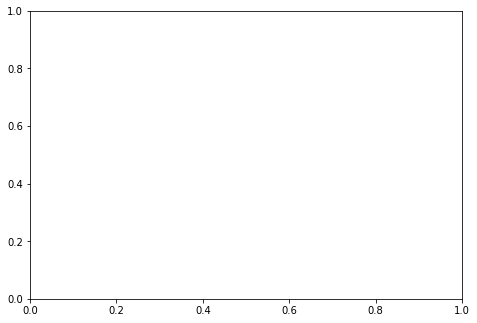

In [108]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
#plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

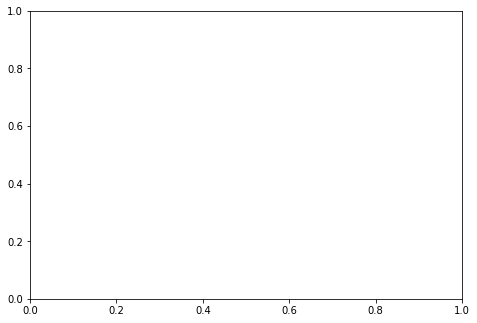

In [110]:
nx.draw(model)

In [111]:
model